<a href="https://colab.research.google.com/github/SiddhiKakkar/Credit_Card_Fraud_Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()
warnings.simplefilter('ignore')

**DATA PREPROCESSING**

In [74]:
df = pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [75]:
df.shape

(284807, 31)

In [76]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [77]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [78]:
df.Time.tail(15)

284792    172774.0
284793    172775.0
284794    172777.0
284795    172778.0
284796    172780.0
284797    172782.0
284798    172782.0
284799    172783.0
284800    172784.0
284801    172785.0
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, dtype: float64

In [79]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**CHECKING THE FREQUENCY OF FRAUDS** 

In [80]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

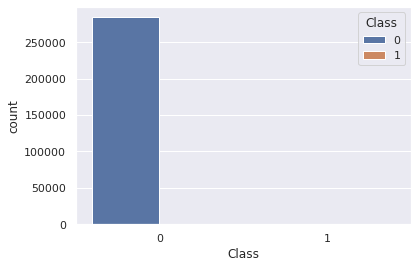

In [81]:
sns.countplot(x=df.Class,hue=df.Class)

**CHECKING THE DISTRIBUTION OF AMOUNT**

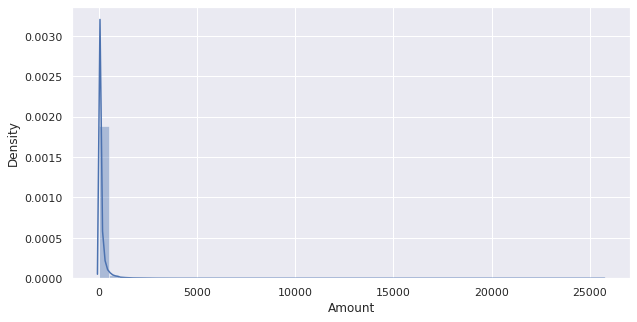

In [82]:
plt.figure(figsize=(10,5))
sns.distplot(df.Amount)

In [83]:
df['Amount-Bins'] = ''

In [84]:
def make_bins(predictor,size=50):
  bins = np.linspace(predictor.min(),predictor.max(),num=size)
  bin_labels = []
  # Index of the final element in bins list
  bins_last_index = bins.shape[0]-1
  for id,val in enumerate(bins):
    if id == bins_last_index:
      continue
    val_to_put = str(int(bins[id])) + 'to' + str(int(bins[id+1]))
    bin_labels.append(val_to_put)
  return bins,bin_labels

In [85]:
bins,bin_labels = make_bins(df.Amount,size=10)

In [86]:
df['Amount-Bins'] = pd.cut(df.Amount,bins=bins,labels=bin_labels,include_lowest=True)
df['Amount-Bins'].head().to_frame()

,Amount-Bins
0,0to2854
1,0to2854
2,0to2854
3,0to2854
4,0to2854


In [87]:
df['Amount-Bins'].value_counts()

0to2854         284484
2854to5709         285
5709to8563          28
8563to11418          4
11418to14272         3
17127to19982         2
22836to25691         1
14272to17127         0
19982to22836         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

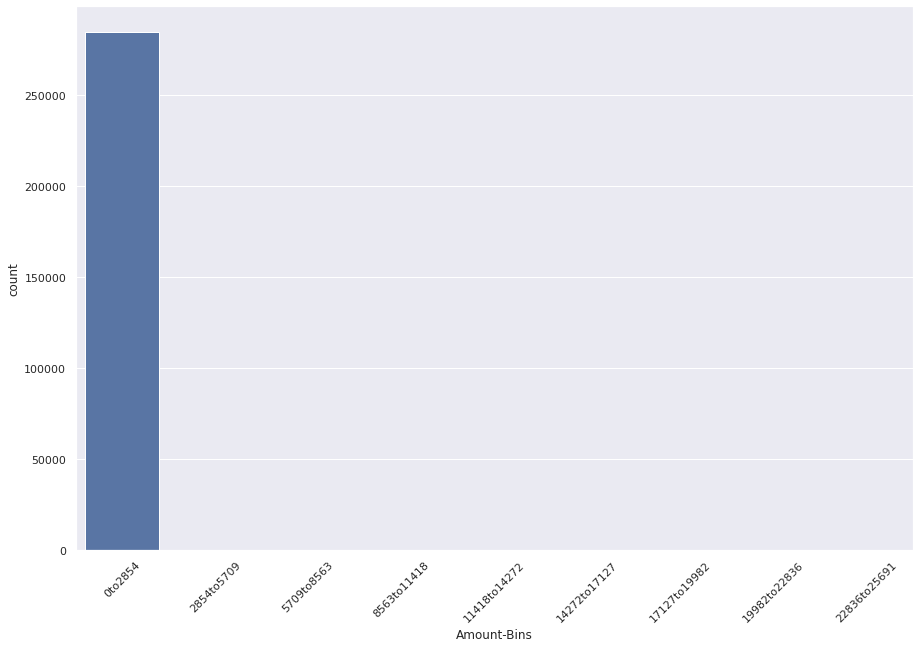

In [88]:
plt.figure(figsize=(15,10))
sns.countplot(x='Amount-Bins',data=df)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

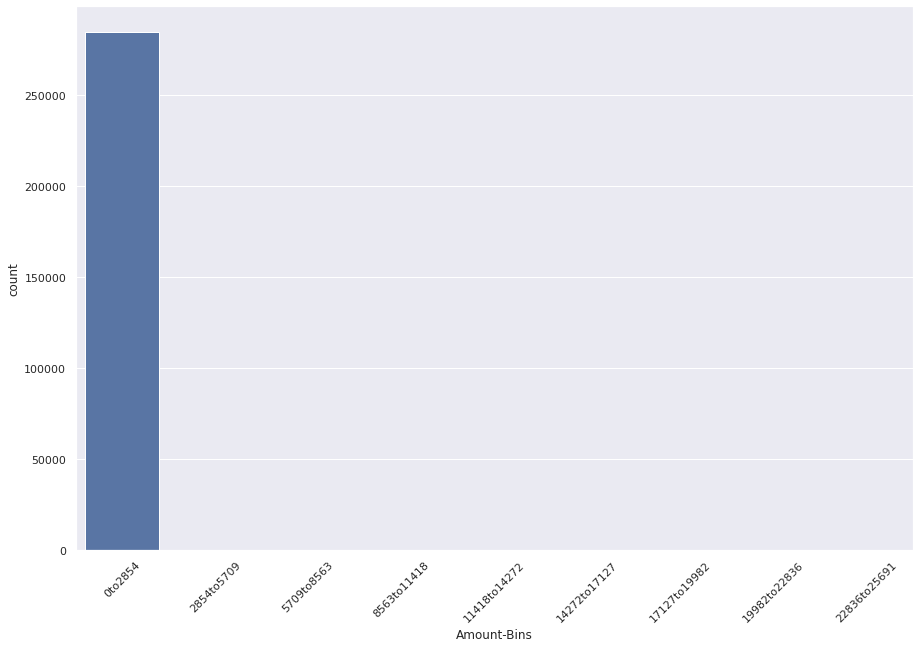

In [89]:
plt.figure(figsize=(15,10))
sns.countplot(x='Amount-Bins',data=df[~(df['Amount-Bins']=='0 to 2854')])
plt.xticks(rotation=45)

In [90]:
df_encoded = pd.get_dummies(data=df,columns=['Amount-Bins'])
df=df_encoded.copy()

In [91]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Class,Amount-Bins_0to2854,Amount-Bins_2854to5709,Amount-Bins_5709to8563,Amount-Bins_8563to11418,Amount-Bins_11418to14272,Amount-Bins_14272to17127,Amount-Bins_17127to19982,Amount-Bins_19982to22836,Amount-Bins_22836to25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,0,0,0,0,0,0,0,0


**BREAKING THE DATASET INTO TRAINING AND TESTING**

In [92]:
X = df.drop(labels='Class',axis=1)
Y = df['Class']
X.shape,Y.shape

((284807, 39), (284807,))

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
xtrain,xtest,ytrain,ytest = train_test_split(
    X,Y,random_state=42,test_size=0.3,shuffle=True
)
print(xtrain.shape,ytrain.shape)
print(xtest.shape,ytest.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


**LOGISTIC REGRESSION**

In [95]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()

In [96]:
# Training the algorithm
lr_model.fit(xtrain,ytrain)

LogisticRegression()

In [97]:
# Predictions on training and testing data
lr_pred_train = lr_model.predict(xtrain)
lr_pred_test = lr_model.predict(xtest)

In [98]:
# Importing the required metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [99]:
tn, fp, fn, tp = confusion_matrix(ytest, lr_pred_test).ravel()
conf_matrix = pd.DataFrame(
    {
        'Predicted Fraud': [tp, fp],
        'Predicted Not Fraud': [fn, tn]
    }, index=['Fraud', 'Not Fraud'])
conf_matrix

,Predicted Fraud,Predicted Not Fraud
Fraud,83,53
Not Fraud,34,85273


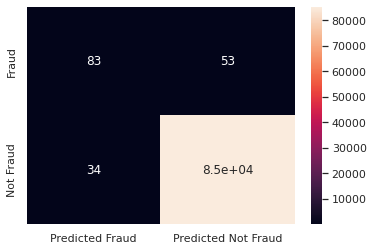

In [100]:
sns.heatmap(conf_matrix,annot=True)

In [101]:
lr_accuracy = accuracy_score(ytest,lr_pred_test)
lr_accuracy

0.9989817773252344

In [102]:
lr_precision = precision_score(ytest,lr_pred_test)
lr_precision

0.7094017094017094

In [103]:
lr_recall = recall_score(ytest,lr_pred_test)
lr_recall

0.6102941176470589

In [104]:
lr_recall_train = recall_score(ytrain,lr_pred_train)
lr_recall_train

0.6685393258426966

In [105]:
from sklearn.metrics import f1_score

In [106]:
lr_f1 = f1_score(ytest,lr_pred_test)
lr_f1

0.6561264822134387

In [107]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(ytest,lr_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.71      0.61      0.66       136

    accuracy                           1.00     85443
   macro avg       0.85      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [109]:
lr_pred_test_prob = lr_model.predict_proba(xtest)[:,1]

In [110]:
from sklearn.metrics import roc_curve, roc_auc_score

In [111]:
fpr,tpr,threshold = roc_curve(ytest,lr_pred_test_prob)

In [112]:
lr_auc = roc_auc_score(ytest,lr_pred_test_prob)
lr_auc

0.9338706774631969

In [113]:
def plot_roc_curve(fpr,tpr,label=None):
  plt.figure(figsize=(8,6))
  plt.title('ROC Curve',fontsize=15)
  plt.plot([0,1],[0,1],'k--')
  plt.plot(fpr,tpr,linewidth=2,label=label)
  plt.xticks(np.arange(0,1,0.05),rotation=90)
  plt.xlabel('False Positive Rates',fontsize=15)
  plt.ylabel('True Positive Rates',fontsize=15)
  plt.legend(loc='best')
  plt.show()

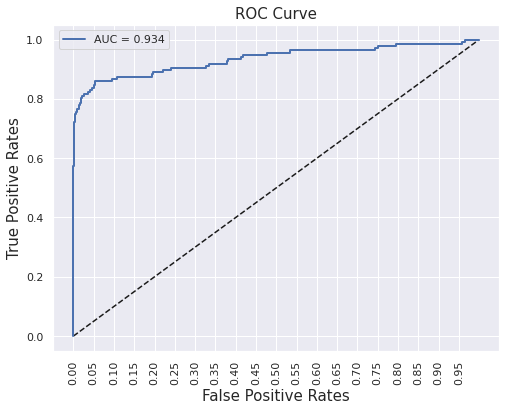

In [114]:
plot_roc_curve(fpr=fpr,tpr=tpr,label="AUC = %.3f" % lr_auc)

**POLYNOMIAL FEATURES**

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
# Getting the polynomial features
poly = PolynomialFeatures(degree=2)
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.fit_transform(xtest)

# Training the model
model = LogisticRegression()
model.fit(xtrain_poly,ytrain)

# Getting the probabilities
train_prob = model.predict_proba(xtrain_poly)[:,1]
test_prob = model.predict_proba(xtest_poly)[:,1]

# Computing the ROC Score
roc_auc_score(ytrain,train_prob),roc_auc_score(ytest,test_prob)

(0.9122902475491923, 0.9238498202685249)

In [117]:
fpr_poly,tpr_poly,threshold_poly = roc_curve(ytest,test_prob)

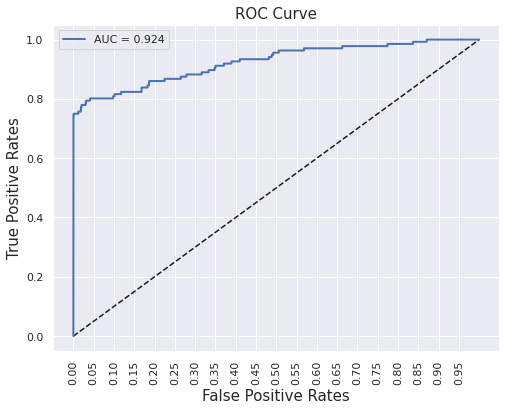

In [118]:
plot_roc_curve(fpr=fpr_poly, tpr=tpr_poly, label='AUC = %.3f' %  roc_auc_score(ytest, test_prob))

In [119]:
recall_score(ytest,model.predict(xtest_poly))

0.75

**SUPPORT VECTOR MACHINE**

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms=MinMaxScaler()

In [121]:
# Let's first check the head of the explanatory variables which are to be scaled.
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0to2854,Amount-Bins_2854to5709,Amount-Bins_5709to8563,Amount-Bins_8563to11418,Amount-Bins_11418to14272,Amount-Bins_14272to17127,Amount-Bins_17127to19982,Amount-Bins_19982to22836,Amount-Bins_22836to25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,149.62,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,2.69,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,378.66,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,123.50,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,69.99,1,0,0,0,0,0,0,0,0


In [122]:
X_scaled = mms.fit_transform(X)

In [123]:
X_scaled = pd.DataFrame(data=X_scaled,columns=X.columns)
X_scaled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount,Amount-Bins_0to2854,Amount-Bins_2854to5709,Amount-Bins_5709to8563,Amount-Bins_8563to11418,Amount-Bins_11418to14272,Amount-Bins_14272to17127,Amount-Bins_17127to19982,Amount-Bins_19982to22836,Amount-Bins_22836to25691
0,0.000000,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,...,0.005824,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,...,0.000105,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000006,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,...,0.014739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000006,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,...,0.004807,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000012,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,...,0.002724,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
xtrainS,xtestS,ytrainS,ytestS = train_test_split(
    X_scaled,Y,random_state=42,test_size=0.30,shuffle=True
)

In [125]:
print(xtrainS.shape,ytrainS.shape)
print(xtestS.shape,ytestS.shape)

(199364, 39) (199364,)
(85443, 39) (85443,)


In [126]:
from sklearn.svm import SVC

In [127]:
svc_model = SVC(kernel='linear',probability=True)

In [128]:
svc_model.fit(xtrainS,ytrainS)

SVC(kernel='linear', probability=True)

In [129]:
svc_pred = svc_model.predict(xtestS)

In [130]:
svc_recall = recall_score(ytestS,svc_pred)

In [131]:
svc_recall

0.8014705882352942

In [132]:
svc_pred_prob = svc_model.predict_proba(xtestS)[:,1]

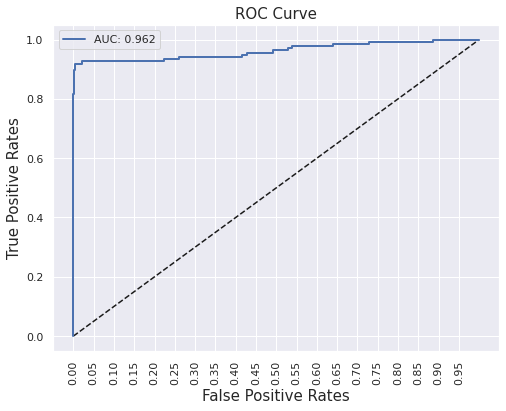

In [133]:
# First, getting the auc score
svc_auc = roc_auc_score(ytestS,svc_pred_prob)

# Now, let's get the fpr and tpr
fpr,tpr,threshold = roc_curve(ytestS,svc_pred_prob)

# Now, let's draw the curve
plot_roc_curve(fpr,tpr,'AUC: %.3f' % svc_auc)

**TUNING THE HYPER-PARAMETERS**

In [134]:
# For Kernel = rbf
tuned_rbf = {'kernel':['rbf'],'gamma':[
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
# For kernel = sigmoid
tuned_sigmoid = {'kernel': ['sigmoid'], 'gamma': [
    1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

# For kernel = linear
tuned_linear = {'kernel': ['linear'], 'C': [
    0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}

In [135]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
rs_rbf = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_rbf, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_sigmoid = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_sigmoid, n_iter=500, n_jobs=4, scoring='roc_auc')

rs_linear = RandomizedSearchCV(estimator=SVC(probability=True), 
        param_distributions=tuned_linear, n_iter=500, n_jobs=4, scoring='roc_auc')

**For kernel rbf:**

In [ ]:
rs_rbf.fit(xtrainS,ytrainS)

In [ ]:
rs_rbf.best_estimator_

In [ ]:
svc_rbf_best_est.fit(xtrainS,ytrainS)

In [ ]:
svc_rbf_best_est_pred = svc_rbf_best_est.predict(xtestS)

In [ ]:
svc_rbf_best_est_pred_proba = svc_rbf_best_est.predict_proba(xtestS)[:, 1]

In [ ]:
# Getting the AUC Score
svc_rbf_auc = roc_auc_score(ytestS,svc_rbf_best_est_pred_proba)

In [ ]:
# Getting the Recall
svc_rbf_recall = recall_score(ytestS,svc_rbf_best_est_pred)
svc_rbf_recall

In [ ]:
fpr,tpr,threshold = roc_curve(ytestS,svc_rbf_best_est_pred_proba)
plot_roc_curve(fpr,tpr,'AUC = %.3f' % svc_rbf_auc)

In [ ]:
rs_sigmoid.fit(xtrainS,ytrainS)

In [ ]:
svc_sigmoid = rs_sigmoid.best_estimator_

In [ ]:
svc_sigmoid.fit(xtrainS,ytrainS)

In [ ]:
svc_sigmoid_pred = svc_sigmoid.predict(xtestS)
svc_sigmoid_pred_proba = svc_sigmoid.predict_proba(xtestS)[:,1]

In [ ]:
# AUC
svc_sigmoid_auc = roc_auc_score(ytestS,svc_sigmoid_pred_proba)
svc_sigmoid_auc

In [ ]:
# Recall 
svc_sigmoid_recall = recall_score(ytestS,svc_sigmoid_pred)
svc_sigmoid_recall

In [ ]:
fpr, tpr, threshold = roc_curve(ytestS, svc_sigmoid_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_sigmoid_auc)

In [ ]:
rs_linear.fit(xtrainS, ytrainS)

In [ ]:
svc_linear = rs_linear.best_estimator_

In [ ]:
svc_linear.fit(xtrainS, ytrainS)

In [ ]:
svc_linear_pred = svc_linear.predict(xtestS)
svc_linear_pred_proba = svc_linear.predict_proba(xtestS)[:, 1]

In [ ]:
# AUC and ROC Curve
svc_linear_auc = roc_auc_score(ytestS, svc_linear_pred_proba)

fpr, tpr, threshold = roc_curve(ytestS, svc_linear_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % svc_linear_auc)

In [ ]:
# Recall
svc_linear_recall = recall_score(ytestS, svc_linear_pred)
svc_linear_recall

**Naive Bayes Algorithm**

In [138]:
from sklearn.naive_bayes import GaussianNB

In [139]:
nb = GaussianNB()

In [140]:
nb.fit(xtrain, ytrain)

GaussianNB()

In [141]:
nb_pred = nb.predict(xtest)
nb_pred_proba = nb.predict_proba(xtest)[:, 1]

In [142]:
nb_auc = roc_auc_score(ytest, nb_pred)

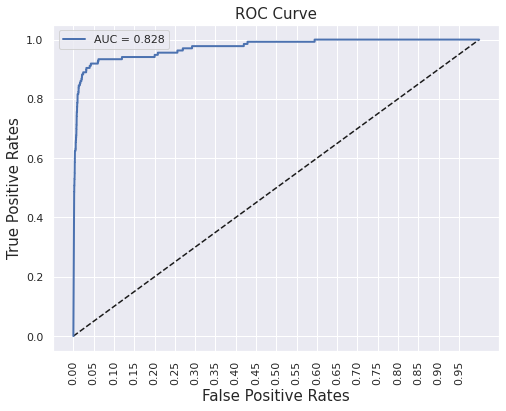

In [143]:
fpr, tpr, threshold = roc_curve(ytestS, nb_pred_proba)
plot_roc_curve(fpr, tpr, 'AUC = %.3f' % nb_auc)

In [144]:
nb_recall = recall_score(ytest, nb_pred)
nb_recall

0.6617647058823529

Conclusion: Naive Bayes didn't perform well as compared to the other ones.